# Training a simple Perceptron in NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [22]:
#install animation lib
!pip install celluloid --quiet

In [3]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)

#normalize y to [-1,1]
y=(y*2-1)

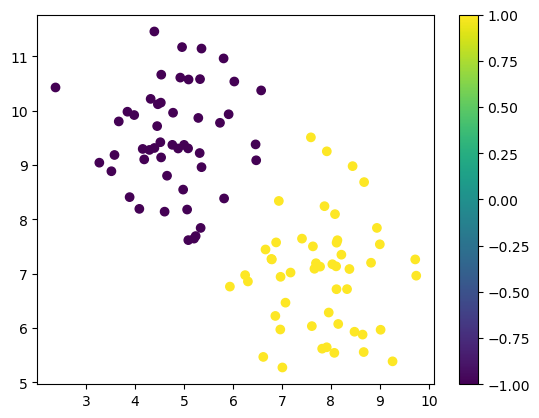

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

## Before: Parameterize the classifier hyper-plane
* find $w$ and $b$ 

In [5]:
#helper function to find parameters
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


In [6]:
#set parameter
b=2
w=np.array([1,-1]) #norm=1 would be ~0.70... but 0.5 works fine

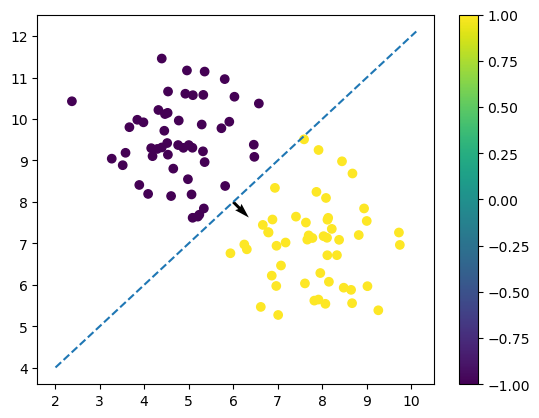

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
abline(1,2)
plt.quiver(6,8,w[0],w[1])# plot normal vector

## Gridsearch for $w$

In [8]:
n=10
s=0.1
w=np.array([0.0,0.0])
err=np.zeros((2*int(n/s),2*int(n/s)))
for w0 in np.arange(-n,n,s):
    for w1 in np.arange(-n,n,s):
        w[0]=(float(w0)/float(n*s))
        w[1]=(float(w1)/float(n*s))
        #print(int(n/s+w0/s),int(n/s+w1/s))
        err[int(n/s+w0/s),int(n/s+w1/s)]=(y==np.sign(w.dot(X.T))).sum()

Text(0, 0.5, 'w0')

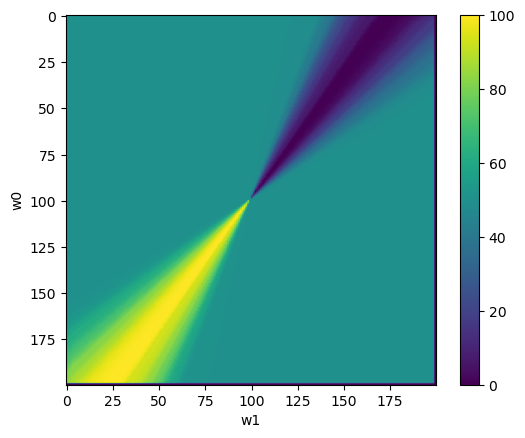

In [9]:
plt.imshow(err)
plt.colorbar()
plt.xlabel("w1")
plt.ylabel("w0")

In [10]:
#get max valua
pos=np.unravel_index(err.argmax(), err.shape)
w=np.array([-n+pos[0]*s,-n+pos[1]*s])
w

array([ 0.3, -0.4])

In [11]:
#test
(y==np.sign(w.dot(X.T))).sum()

61

## Now: learn only $w$ by gradient based optimization 
$b$ ist just a linear scaling that can be implicitely included in a non -normalized $w$

In [12]:
# init random w
w=np.random.random(2)

In [13]:
w


array([0.95261942, 0.49582293])

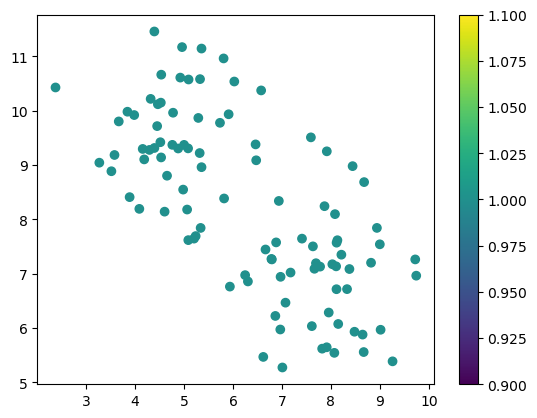

In [14]:
#visualize init classification results

res=np.sign(w.dot(X.T)) #activation
plt.scatter(X[:,0],X[:,1],c=res)
plt.colorbar()



In [15]:
#gradient descent for singe perceptron
def train_gd(X, Y):
    w = np.random.random(2)
    eta = 0.01 #learningrate
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0: #is classification wrong?
                w = w + eta*X[i]*Y[i]
    return w


In [16]:
w=train_gd(X,y)

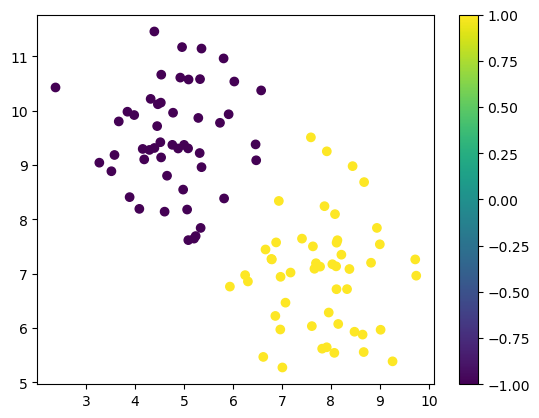

In [17]:
#visualize init calssification results

res=np.sign(w.dot(X.T)) #activation

plt.scatter(X[:,0],X[:,1],c=res)
plt.colorbar()


In [25]:
#train with loss plot
from celluloid import Camera

def train_gd_plot(X, Y):

    w = np.random.random(2)
    eta = 0.001
    n = 3
    errors = []
    
    camera = Camera(plt.figure())
    
    for t in range(n):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error = (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
            errors.append(total_error*-1)
            val=np.sign(w.dot(X.T))
            plt.scatter(X[:,0],X[:,1],c=val)
            plt.annotate("iter:"+str(i*n+i)+"\n w=("+str(w[0])+","+str(w[1])+")\n error:"+str(total_error), xy=(0.10, 0.90), xycoords='axes fraction')
            
            #plt.xlabel("iter:"+str(i*n+i)+"\n w=("+str(w[0])+","+str(w[1])+")\n error:"+str(total_error))
            camera.snap()
        
    anim = camera.animate(blit=True)
    anim.save('train_video.gif')
    
    
    return w, errors


MovieWriter ffmpeg unavailable; using Pillow instead.


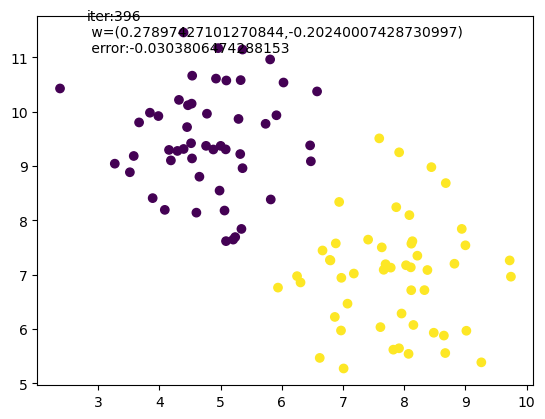

In [26]:
w,errors=train_gd_plot(X, y)

In [27]:
#result:
w

array([ 0.27897427, -0.20240007])

Text(0, 0.5, 'Total Loss')

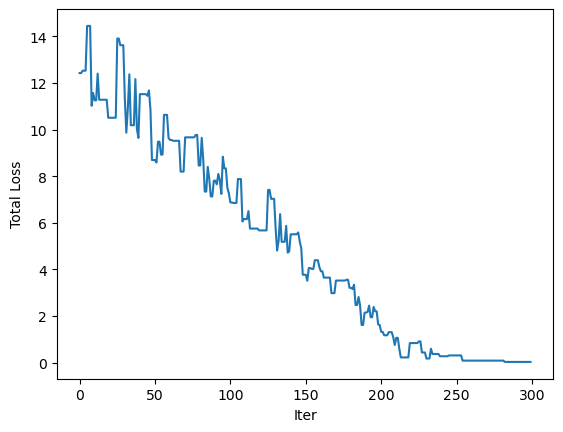

In [28]:
#plot loss
plt.figure()
plt.plot(errors)
plt.xlabel('Iter')
plt.ylabel('Total Loss')

<img src="train_video.gif">